In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\paulj\Desktop\Coding\TCS\webmd.csv")

In [3]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [5]:
df.shape

(362806, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

Inserting Name and Race column

In [8]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [9]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head()

,Name
0,Irving
1,Marni
2,Annalee
3,Russell
4,Devon


In [10]:
import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head()

,Race
0,Hispanic
1,Asian
2,Hispanic
3,Asian
4,White


In [11]:
df = pd.concat([data_name, data_race, df], axis=1).reindex(df.index)
df.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Irving,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Marni,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Annalee,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Russell,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Devon,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [12]:
df.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [13]:
# Nan rows were dropped
df.dropna(axis = 0, inplace = True)
df.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [14]:
# Handling instances with whitespaces
for i in df:
    df[i]=np.where(df[i]==" ",np.NAN,df[i])

df.isna().sum()

Name                 0
Race                 0
Age              12199
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41824
Satisfaction         0
Sex              26533
Sides            17454
UsefulCount          0
dtype: int64

In [15]:
df.dropna(axis=0, inplace = True)
df.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

Date

In [16]:
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month
df['day_of_week'] = pd.to_datetime(df['Date'], errors='coerce').dt.day_name()

In [17]:
df.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Month,day_of_week
0,Irving,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0,2014,9,Sunday
1,Marni,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0,2011,1,Thursday
6,Dania,Hispanic,25-34,Birth Control,6/15/2017,wymzya fe,163180.0,5.0,5.0,Haven't gotten pregnant so it does it's job. I...,2.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,2017,6,Thursday
7,Faviola,White,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180.0,5.0,5.0,I have take this for 5 years age 45-50 to prev...,5.0,Female,"Nausea , vomiting , headache , bloating , ...",0.0,2017,1,Monday
9,Maragaret,Hispanic,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800.0,4.0,2.0,The 12 hour spray only works for me for 6 hours.,2.0,Male,"Temporary burning, stinging, dryness in the no...",0.0,2012,10,Monday


In [18]:
# Univariate analysis for numerical variables
numerical_vars = ['EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'Age']

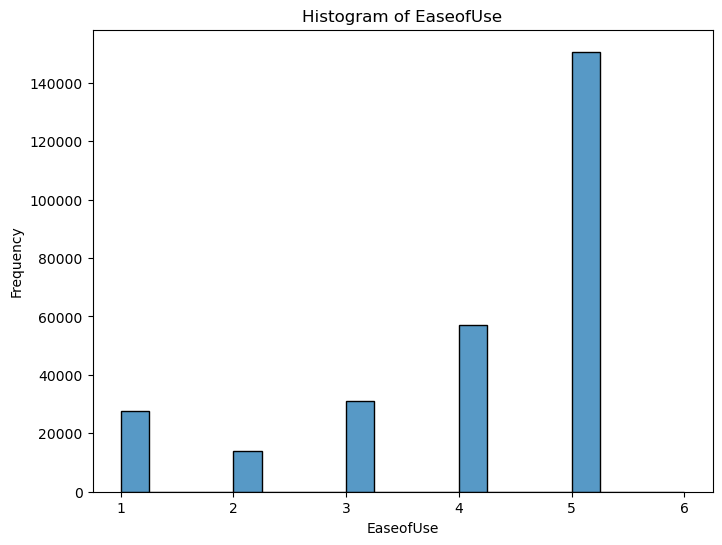

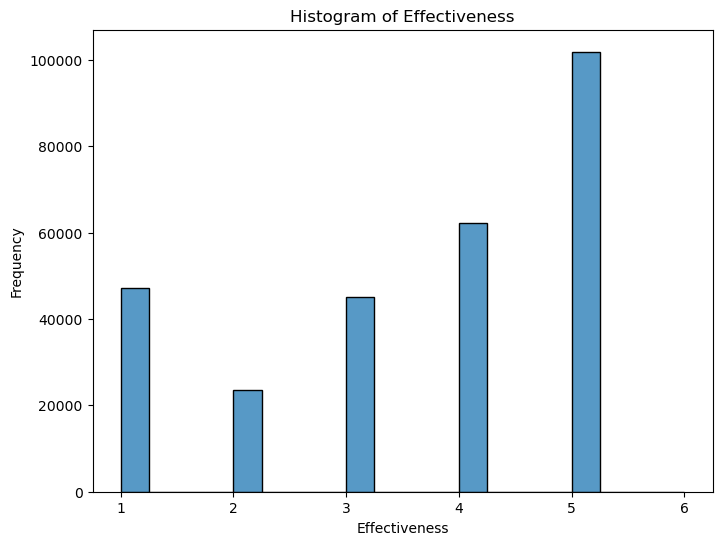

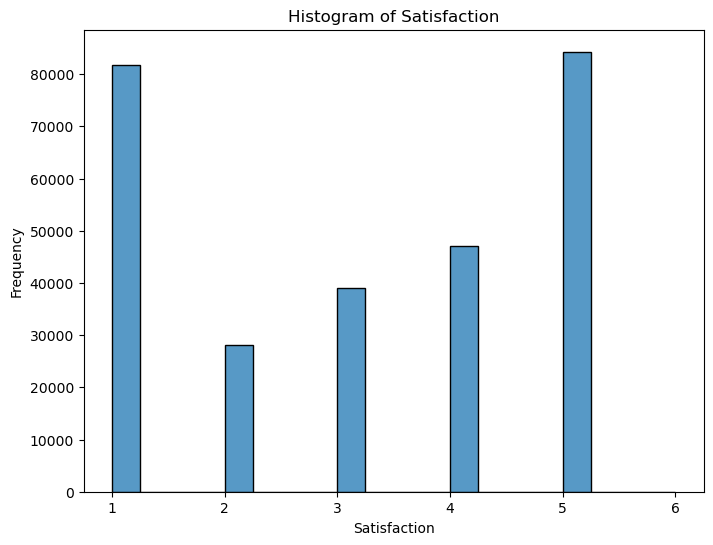

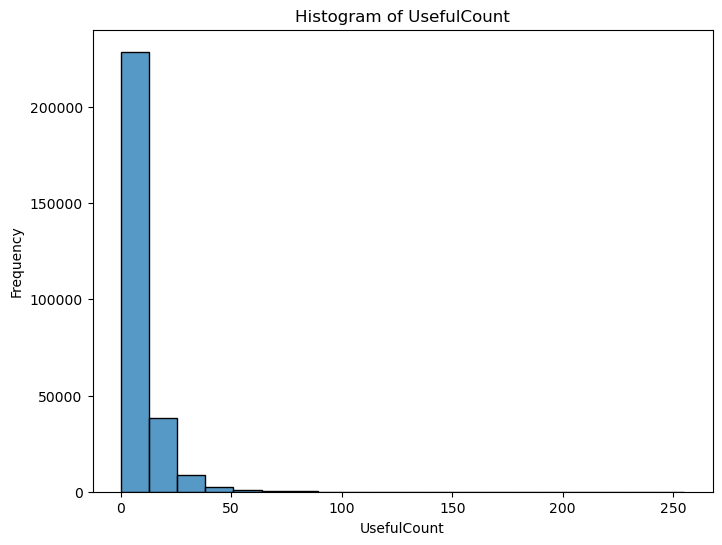

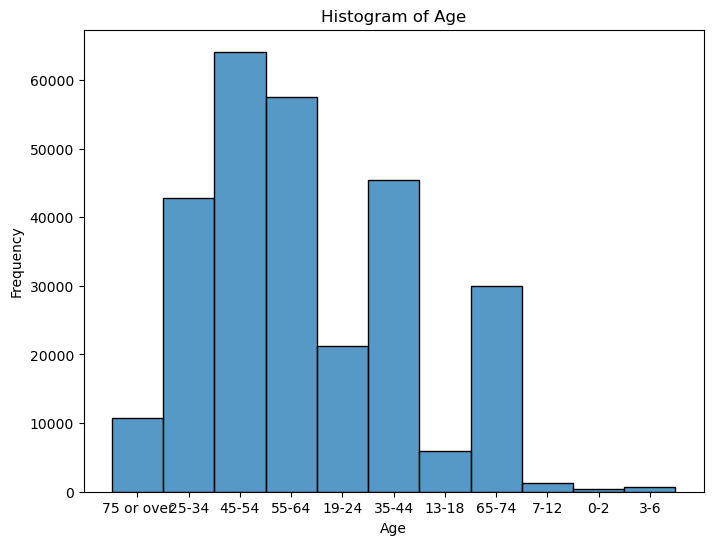

In [19]:
# Histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

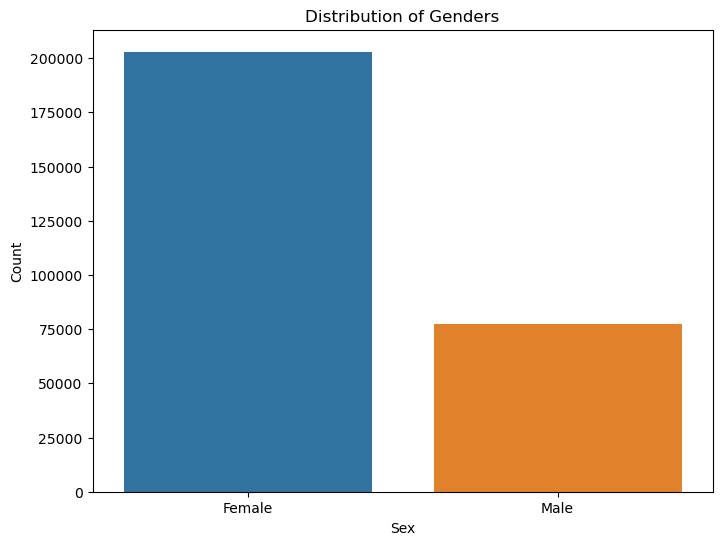

In [20]:
# Create a count plot (histogram) for the "Sex" column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', order=df['Sex'].value_counts().index)
plt.title('Distribution of Genders')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Top 20 Drugs based on No. of Users

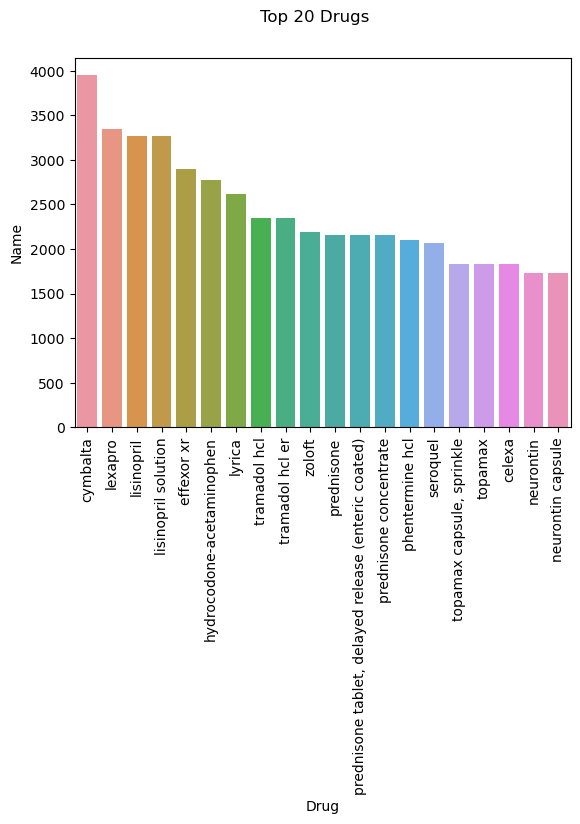

In [21]:
data_= df['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Top 15 Conditions

Text(0, 0.5, 'Users')

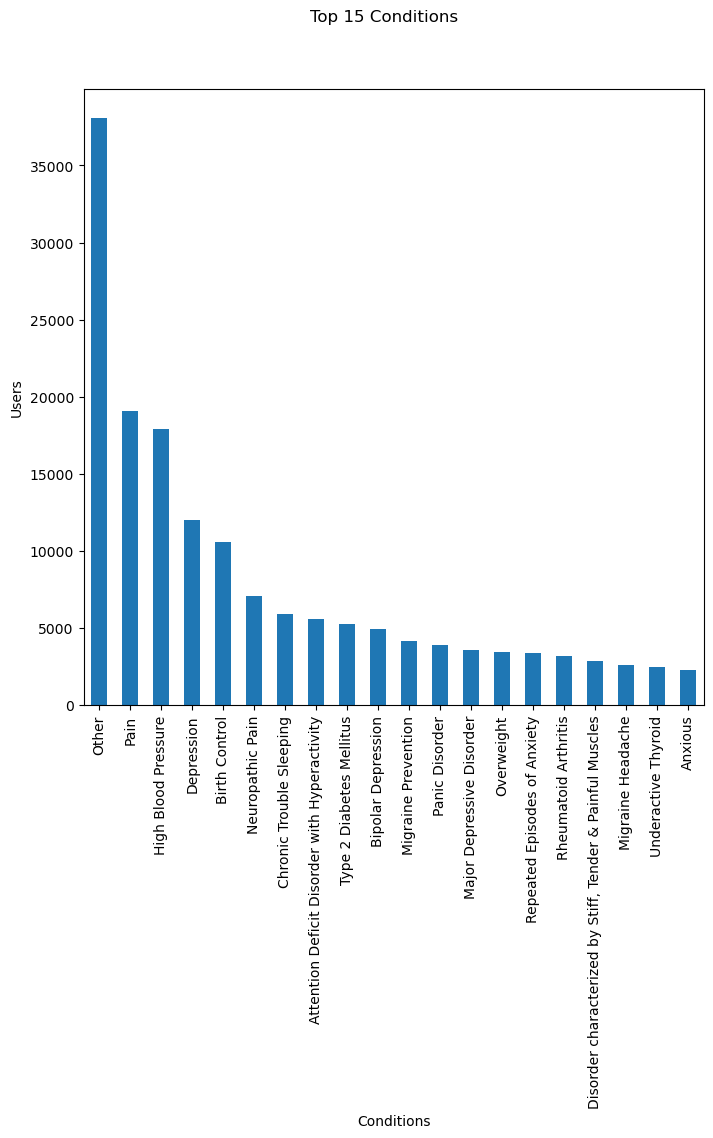

In [22]:
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

Gender and Age wise users

Text(0.5, 1.0, 'Users by Age and Gender')

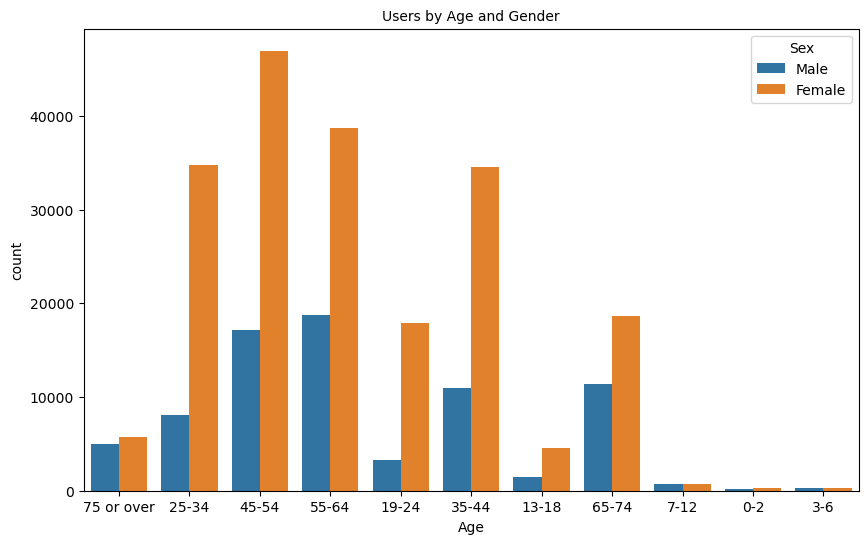

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=df)
plt.title("Users by Age and Gender", fontsize = 10)

C:\Users\paulj\AppData\Local\Temp\ipykernel_15788\359660968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numerical_vars].corr()


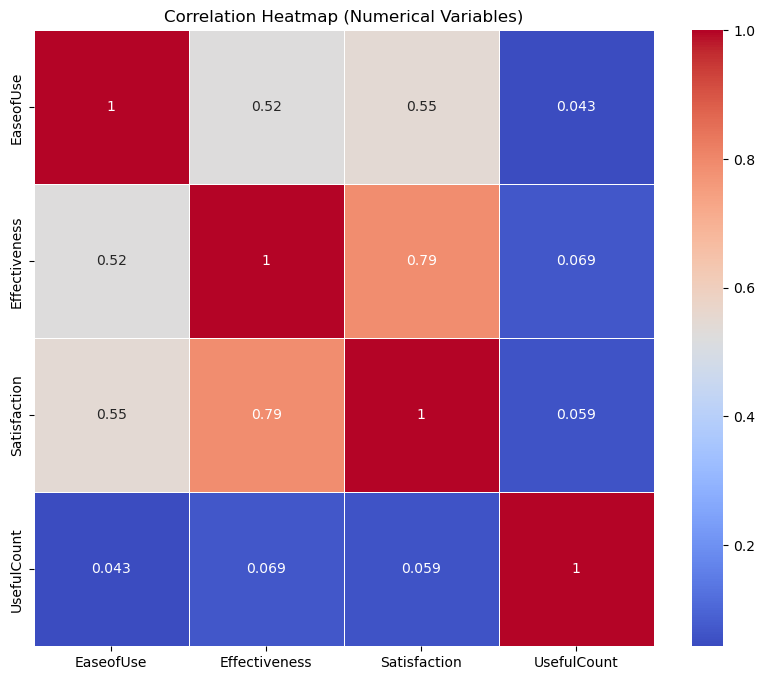

In [24]:
# Heatmap to visualize correlations between numerical variables
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

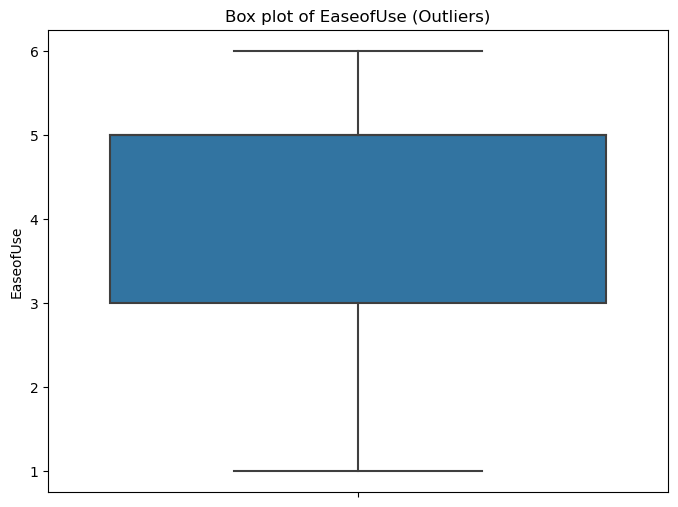

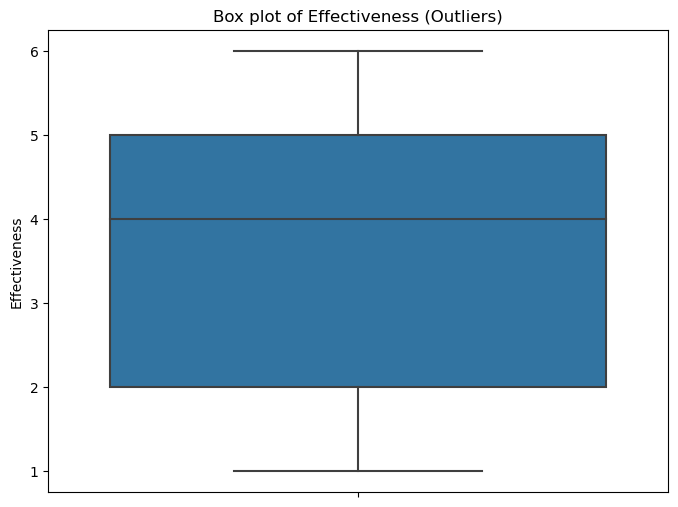

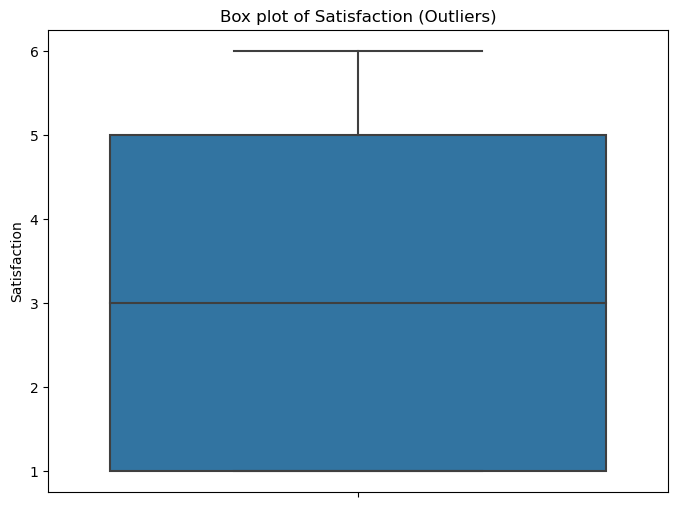

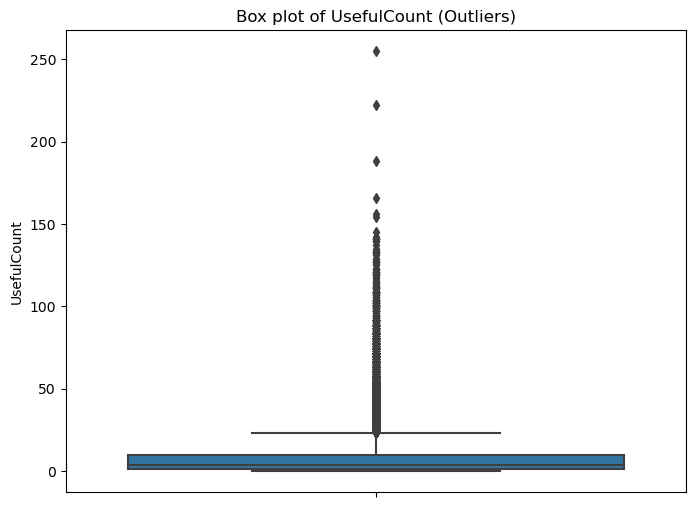

In [25]:
# Identify and visualize outliers in numerical variables using box plots
numerical_vars1 = ['EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount']
for var in numerical_vars1:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=var)
    plt.title(f'Box plot of {var} (Outliers)')
    plt.ylabel(var)
    plt.show()


NLP

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


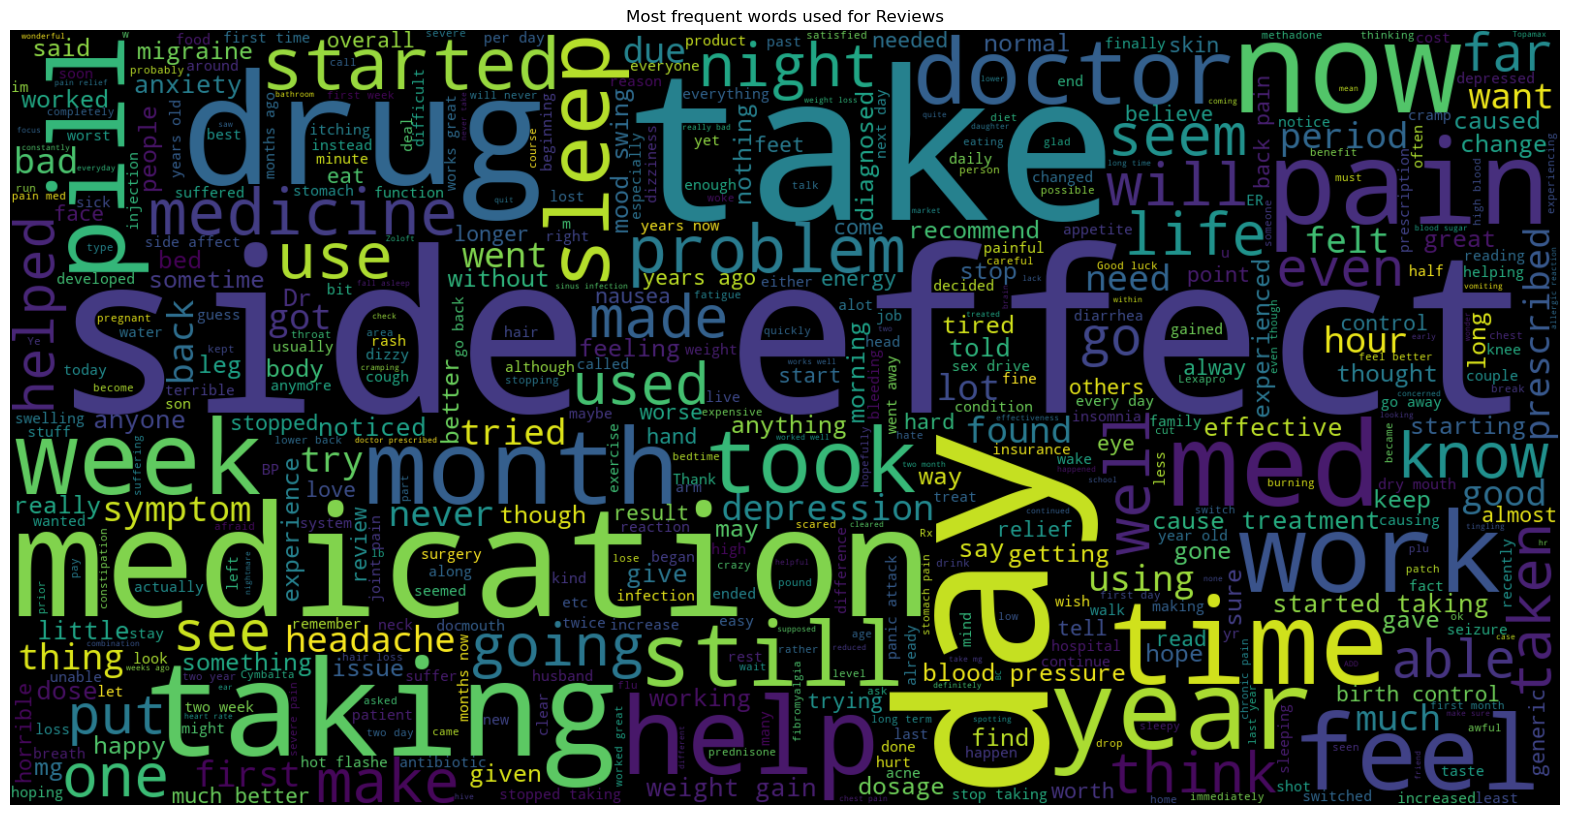

In [27]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500, width=1600,height=800).generate("".join(df.Reviews))
plt.imshow(wc,interpolation="bilinear")
plt.title("Most frequent words used for Reviews")
plt.axis("off")
plt.show()

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [32]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\paulj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [36]:
from bs4 import BeautifulSoup
import re

In [37]:
def review_to_words(raw_review):
  # Delete HTML
  review_text = BeautifulSoup(raw_review,'html.parser').get_text()
  # Make a Space
  letters_only = re.sub('[^a-zA-Z]',' ',review_text)
  # Lower Case
  words = letters_only.lower().split()
  # Stopwords
  meaningful_words = [w for w in words if not w in stop]
  # Lemmatization
  lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
  # Space join words
  return(' '.join(lemmatize_words))


In [38]:
df['Reviews_clean'] = df['Reviews'].apply(review_to_words)

C:\Users\paulj\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\paulj\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [39]:
df.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'day_of_week', 'Reviews_clean'],
      dtype='object')

In [40]:
df = df[['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Reviews_clean', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'day_of_week']]

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
pd.set_option('display.max_rows', None)

In [43]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [44]:
df.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Reviews_clean,Satisfaction,Sex,Sides,UsefulCount,Year,Month,day_of_week
0,Irving,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me. When I first began using this drug some years ago - tiredness as a problem but is not currently.,retired physician med tried allergy seasonal one effective first began using drug year ago tiredness problem currently,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur.",0.0,2014,9,Sunday
1,Marni,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurting it went away after taking the medicine,cleared right even throat hurting went away taking medicine,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur.",1.0,2011,1,Thursday
6,Dania,Hispanic,25-34,Birth Control,6/15/2017,wymzya fe,163180.0,5.0,5.0,"Haven't gotten pregnant so it does it's job. I was switched to this brand from another generic. I get nauseous and generally feel tired on this, also more headaches.",gotten pregnant job switched brand another generic get nauseous generally feel tired also headache,2.0,Female,"Nausea , vomiting , headache , bloating , breast tenderness, swelling of the ankles /feet (fluid retention), or weight change may occur.",0.0,2017,6,Thursday
7,Faviola,White,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180.0,5.0,5.0,I have take this for 5 years age 45-50 to prevent ovarian cysts (I had 2 burst). Now stopped because of age. No side effects.,take year age prevent ovarian cyst burst stopped age side effect,5.0,Female,"Nausea , vomiting , headache , bloating , breast tenderness, swelling of the ankles /feet (fluid retention), or weight change may occur.",0.0,2017,1,Monday
9,Maragaret,Hispanic,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800.0,4.0,2.0,The 12 hour spray only works for me for 6 hours.,hour spray work hour,2.0,Male,"Temporary burning, stinging, dryness in the nose, runny nose , and sneezing may occur.",0.0,2012,10,Monday


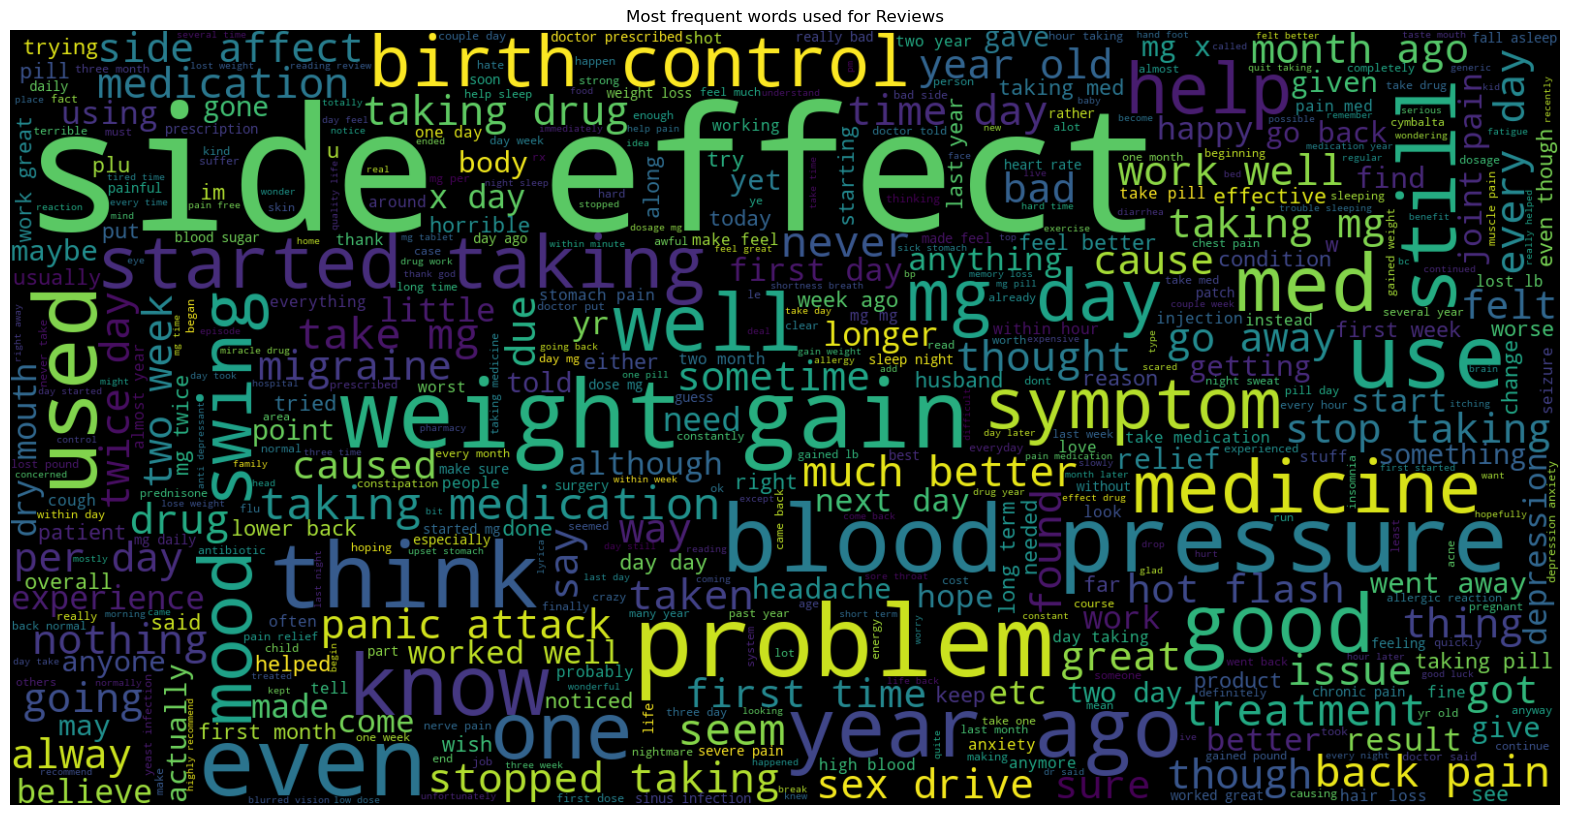

In [45]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500, width=1600,height=800).generate("".join(df.Reviews_clean))
plt.imshow(wc,interpolation="bilinear")
plt.title("Most frequent words used for Reviews")
plt.axis("off")
plt.show()

Encoding

In [46]:
df = df.drop(['Name','Race','Date', 'DrugId', 'Reviews','UsefulCount','Year','Month','day_of_week'],axis=1)

In [47]:
df.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Reviews_clean,Satisfaction,Sex,Sides
0,75 or over,Stuffy Nose,25dph-7.5peh,5.0,5.0,retired physician med tried allergy seasonal one effective first began using drug year ago tiredness problem currently,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur."
1,25-34,Cold Symptoms,25dph-7.5peh,5.0,5.0,cleared right even throat hurting went away taking medicine,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur."
6,25-34,Birth Control,wymzya fe,5.0,5.0,gotten pregnant job switched brand another generic get nauseous generally feel tired also headache,2.0,Female,"Nausea , vomiting , headache , bloating , breast tenderness, swelling of the ankles /feet (fluid retention), or weight change may occur."
7,45-54,Disease of Ovaries with Cysts,wymzya fe,5.0,5.0,take year age prevent ovarian cyst burst stopped age side effect,5.0,Female,"Nausea , vomiting , headache , bloating , breast tenderness, swelling of the ankles /feet (fluid retention), or weight change may occur."
9,55-64,Stuffy Nose,"12 hour nasal relief spray, non-aerosol",4.0,2.0,hour spray work hour,2.0,Male,"Temporary burning, stinging, dryness in the nose, runny nose , and sneezing may occur."


In [48]:
# Get the list of top 100 drugs
top_100_drugs = df['Drug'].value_counts().head(100).index.tolist()

# Create a new DataFrame with rows where the 'drug' column is in the top 100 drugs list
df1 = df[df['Drug'].isin(top_100_drugs)]

In [49]:
#Age Mapping

In [50]:
df['Age'].value_counts()

45-54         64125
55-64         57469
35-44         45467
25-34         42799
65-74         29982
19-24         21233
75 or over    10727
13-18          5975
7-12           1334
3-6             623
0-2             393
Name: Age, dtype: int64

In [51]:
age_mapping = {
    '0-2': 0,
    '3-6': 1,
    '7-12': 2,
    '13-18': 3,
    '19-24': 4,
    '25-34': 5,
    '35-44': 6,
    '45-54': 7,
    '55-64': 8,
    '65-74': 9,
    '75 or over': 10
}

In [52]:
df1['Age'] = df1['Age'].map(age_mapping)

C:\Users\paulj\AppData\Local\Temp\ipykernel_15788\3000434068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['Age'].map(age_mapping)


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder  = LabelEncoder()

In [55]:
df1['Condition'] = label_encoder.fit_transform(df1['Condition'])
df1['Drug'] = label_encoder.fit_transform(df1['Drug'])
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
df1['Sides'] = label_encoder.fit_transform(df1['Sides'])

C:\Users\paulj\AppData\Local\Temp\ipykernel_15788\4262361200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Condition'] = label_encoder.fit_transform(df1['Condition'])
C:\Users\paulj\AppData\Local\Temp\ipykernel_15788\4262361200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Drug'] = label_encoder.fit_transform(df1['Drug'])
C:\Users\paulj\AppData\Local\Temp\ipykernel_15788\4262361200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df1['Reviews_clean'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [58]:
df1 = pd.concat([df1, tfidf_df], axis=1)

In [59]:
df1 = df1.dropna()

In [60]:
df1 = df1.drop('Reviews_clean',axis=1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train = df1.drop(['Sides'],axis=1)

In [63]:
y_train = df1['Sides']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [69]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision (Weighted): {precision}')
print(f'Recall (Weighted): {recall}')
print(f'F1 Score (Weighted): {f1}')

Precision (Weighted): 0.8936066503624992
Recall (Weighted): 0.8892435365464411
F1 Score (Weighted): 0.8845775383277517


In [70]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

         6.0       0.83      0.67      0.74       118
         7.0       0.94      0.74      0.83        92
         9.0       0.99      1.00      0.99      1319
        10.0       0.96      0.99      0.97       411
        12.0       0.94      0.99      0.97       528
        15.0       0.84      0.86      0.85       262
        19.0       0.84      0.97      0.90       694
        20.0       0.95      0.54      0.69       106
        26.0       0.97      0.88      0.92       320
        34.0       0.92      0.74      0.82       167
        37.0       0.92      0.99      0.95       646
        40.0       0.84      0.52      0.64       543
        41.0       0.88      0.94      0.91       544
        43.0       0.73      0.98      0.84       973
        49.0       0.77      0.65      0.71       290
        50.0       0.96      0.98      0.97       761
        51.0       0.80      0.57      0.67       265
   